In [1]:
#定義並建立一神經網路
class mul_layer():
    def _ini_(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x*y
        return out
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

In [2]:
# 初始值設定
n_X = 2
price_Y = 100
b_TAX = 1.1

# 指定Build _Network組合
mul_fruit_layer = mul_layer()
mul_tax_layer = mul_layer()

In [3]:
#forward 
fruit_price = mul_fruit_layer.forward(price_Y, n_X)
total_price = mul_tax_layer.forward(fruit_price, b_TAX)

#backward 
dtotal_price = 1 #this is linear function, which y=x, dy/dx=1
d_fruit_price, d_b_TAX = mul_tax_layer.backward(dtotal_price)
d_price_Y, d_n_X =  mul_tax_layer.backward(d_fruit_price)

In [4]:
#result
print("fruit price: %i"%fruit_price)
print("針對所有水果價格微分, 得到 TAX: %2f" %d_fruit_price)

fruit price: 200
針對所有水果價格微分, 得到 TAX: 1.100000


In [5]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
'''
定義數學函數:
y=f(x) = 1/(1+np.exp(-x));
dy/dx = df = y*(1-y) 

為了計算方便, 這邊把 y=f(x) 與 dy/dx 放在同一function 裡面;
利用 deriv (derivative)做變數, 來分別指定方程式

'''    

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
'''
通過 “nonlin” 函數體還能得到 sigmod 函數的導數（當形參 deriv 為 True 時）。
Sigmoid 函數優異特性之一，在於只用它的輸出值便可以得到其導數值。
若 Sigmoid 的輸出值用變數 out 表示，則其導數值可簡單通過式子 out *(1-out) 
'''

'''
input dataset
輸入資料集初始化為 numpy 中的矩陣。每一 column 為一個“訓練實例”，
每一 row 的對應著一個輸入節點。這樣，我們的神經網路便有 3 個輸入節點，
4 個訓練實例。
'''
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define output dataset 
y = np.array([[0,0,1,1]]).T

'''
輸出資料集進行初始化
.T” 為轉置函數。經轉置後，該  y  矩陣便包含 4 column 1 row。
同我們的輸入一致，每一 column 是一個訓練實例，而每一row（僅有一row）對應一個輸出節點。
因此，我們的網路含有 3 個輸入， 1 個輸出
'''

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
iter = 0

syn0_history = [syn0]
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）

In [6]:
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    
    '''
    首先讓網路基於給定輸入“試著”去預測輸出。
    以至於作出一些調整，使得在每次反覆運算過程中網路能夠表現地更好一點。
    (4 x 3) dot (3 x 1) = (4 x 1)
    此 column 代碼包含兩個步驟。首先，將 l0 與 syn0 進行矩陣相乘。
    然後，將計算結果傳遞給 sigmoid 函數。具體考慮到各個矩陣的維度：
    (4 x 3) dot (3 x 1) = (4 x 1)
    '''
 
    # how much did we miss?
    l1_error = y - l1
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
    
    '''
    對於每一輸入，可知 l1 都有對應的一個“猜測”結果。那麼通過將真實的結果（y）與猜測結果（l1）作減，
    就可以對比得到網路預測的效果怎麼樣。
    l1_error 是一個有正數和負數組成的向量，它可以反映出網路的誤差有多大
    '''
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    
print("Output After Training:")
print("\n")
print(l1)

Output After Training:


[[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]


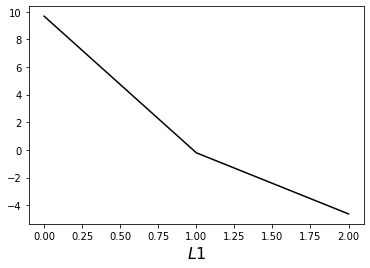

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

In [ ]:
'''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
'''

In [14]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset

y = np.array([[0],
            [1],
            [1],
            [0]])

In [15]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
iter = 0

# define syn1
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

syn0_history = [syn0]
syn1_history = [syn1]

In [19]:
'''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
'''
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
 
    # how much did we miss the target value?
    # l2_error 該值說明了神經網路預測時“丟失”的數目。
    # l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    # l1_error 該值為 l2_delta 經 syn1 加權後的結果，從而能夠計算得到中間層/隱層的誤差。
    # l1_delta 該值為經確信度加權後的神經網路 l1 層的誤差，除了確信誤差很小時，它近似等於 l1_error 。
    
    
    l2_error = y - l2
 
    if (iter% 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))
 
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)
 
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    if (iter% 10000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l2_error))))
        
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    # update weights
    syn1 += np.dot(l1.T,l2_delta)
    syn0 += np.dot(l0.T,l1_delta)
     # syn1 update weights
    
print("Output After Training(根據 L1):")
print(l1)
print("\n\n")
print("Output After Training(根據 L2):")
print(l2)

L2_Error:0.008584525653247153
L1_Error:0.008584525653247153
Output After Training(根據 L1):
[[6.76069140e-01 1.28168755e-01 9.21470414e-01 9.95877555e-01]
 [1.88773220e-01 5.21970024e-04 1.76602692e-02 8.90029850e-01]
 [9.93442315e-01 8.83063661e-01 2.38921940e-02 8.11402016e-01]
 [9.44105493e-01 2.61257038e-02 3.74998459e-05 1.25979354e-01]]



Output After Training(根據 L2):
[[0.00473115]
 [0.99397254]
 [0.99465446]
 [0.00705433]]


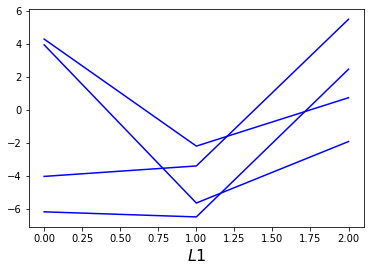

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='blue')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

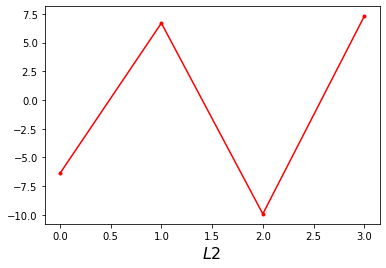

In [22]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='red')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()